# Spherical harmonics

## Introduction

Previously, we approximated the article-on-a-Sphere problem by constructing a Hamiltonian that drew an electron toward a certain radius from the origin. Here we'll see how a set of functions called *Spherical Harmonics* solves the Particle-on-a-Sphere problem *exactly*, which will set us up nicely for more ambitious problems like the Hydrogen atom.

## Nodes, degeneracies, and the $l$ quantum number

For the Particle-on-a-Sphere problem, it turns out that it's convenient to refer to our sets of states with a quantum number $l$ that depends on the number of nodes each set of states has:

The ground state, displayed in Fig. 1, has no nodes, planar or otherwise. We're going to assign $l=0$ to that state.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Particle-on-a-sphere with l=0.jpg" height="400" width="500"/>
<strong>Figure 1</strong>. Isosurface of the ground state eigenfunction of the Particle-on-a-Surface hamiltonian.
</p>

Figure 2 shows one of the three degenerate states, in which we can see that is one planar node. We'll say these states have $l=1$. 

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Particle-on-a-sphere with l=1.jpg" height="400" width="500"/>
<strong>Figure 2</strong>. Isosurface of an eigenfunction of the Particle-on-a-Surface hamiltonian having one planar node.
</p>

The next set of five degenerate states, each with two planar nodes, will all be assigned $l=2$. You may have already detected a pattern here, in which the degeneracy ($g_l$) is related to $l$. It goes like this

$$
g_l = 2l+1 \ \ \ \ (1)
$$

## Spherical harmonic functions as eigenfunctions of the Particle-on-a-Sphere
In fact, the exact eigenfunctions of the Particle-on-a-Sphere -- of which Figs 1 and 2 are approximations -- are known. They are called the *Spherical Harmonic* functions, $Y(\theta,\phi)$, defined as

$$
Y(\theta,\phi)=\epsilon \sqrt{\frac{(2l+1)}{4\pi}\frac{(l-|m_l|)!}{(l+|m_l|)!}}e^{im_l\phi}P_l^k(\cos \theta) \ \ \ \ (2)
$$

where $l=0, 1, 2, ....$ is the quantum number just introduced, $\epsilon=(-1)^m$ for $m_l\geq 0$, and $\epsilon=1$ for $m_l\leq 0$. These eigenfunctions have energies 

$$
E_l = {\hbar^2 l (l+1) \over 2 I} \ \ \ \ (3)
$$

where $I$ is the *moment of inertia* of our particle, 

$$
I = r_0^2 m \ \ \ \ (4)
$$

assuming it is a distance $r_0$ from the origin, and has a mass $m$. 

There's a restriction on the $m_l$ appearing in Eq. 2, 

- $m_l$ can only be 0 when $l=0$ (the ground state)
- $m_l$ can take on values -1, 0, or 1 when $l=1$ (these are the three degenerate set of states you saw just above the ground state)
- $m_l$ can take on values from -2 up to +2 when $l=2$ (the 5-fold degenerate set of states above the $l=1$ set)

So you can see that this restriction exactly matches the degeneracy of each set of $Y(\theta,\phi)$ functions. Even better, $m_l$ provides a way to indicate the different states within a given set -- in other words, we can talk about the three $Y(\theta,\phi)$ functions in the $l=1$ set that you saw as the $m=-1$, $m=0$, and $m=1$ states.

## Connecting Cartesian coordinates to Spherical coordinates
To convert spherical to Cartesian coordinates, we'll use

$$
x = sin(\theta) cos(\phi) \ \ \ \  (5a)
$$
$$
y = sin(\theta) sin(\phi) \ \ \ \  (5b)  
$$
$$
z = cos(\theta) \ \ \ \  (5c)
$$


## Learning goals
The main learning goals of this exercise are:
1. I can describe the relationship between rotational motion and Planck's constant.
1. I can predict the nodal structure and degeneracies of eigenfunctions of the Particle-on-a-Sphere problem.
1. I can compute spherical harmonic functions having any desired set of quantum numbers.


## Reference
Much of the code used here was lifted from https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/ and https://github.com/DalInar/schrodingers-snake/blob/master/SphericalHarmonicsVisualization/SphericalHarmonicsVisualization.ipynb.

In [7]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.special as sp
%matplotlib notebook

In [8]:
# Quantum constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)
m = AssignQuantity(1,'atomic_unit_of_mass'); print(m)

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree
1 electron_mass


### Predicting degeneracies
In the cell below, use Eq. 1 to compute degeneracies of the first four energy levels (i.e., $l=0, 1, 2,$ and $3$).

In [9]:
### BEGIN SOLUTION
for l in range(0,4):
    print('g_l =', 2*l+1)
### END SOLUTION

g_l = 1
g_l = 3
g_l = 5
g_l = 7


### Pause for analysis
How do the results you just got compare to the numerical results you got before?

### BEGIN SOLUTION

Perfect match for l = 0, 1, and 2. We didn't inspect l = 3,

### END SOLUTION

### The Cartesian coordinates of the unit sphere
In the cell below, we make a grid of angles $\theta$ and $\phi$. Your task is to calculate the corresponding Cartesian coordinates (see Eq. 5).

In [10]:
# Specifying a range of zenith (latitude) and azimuthal (longitude) angles
theta = np.linspace(0, np.pi)
phi = np.linspace(0, 2*np.pi)

# Converting them into gridded variables
theta, phi = np.meshgrid(theta, phi)

# Calculate Cartesian coordinates; you can leave out the radius because all have radius = 1
### BEGIN SOLUTION
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
### END SOLUTION

### Visualizing the spherical harmonics projected onto the surface of a sphere
We've set up the cell below so that it projects a $Y(\theta,\phi)$ function of a given $l$ and $m_l$ onto the surface of a sphere. The idea here is to relate these images to the approximate functions you got in the Particle-on-a-Sphere exercise. Be warned about a few things, however:

- The color coding is different.
- The orientation of lobes when $l=1$ or greater is likely to be different.

<IPython.core.display.Javascript object>


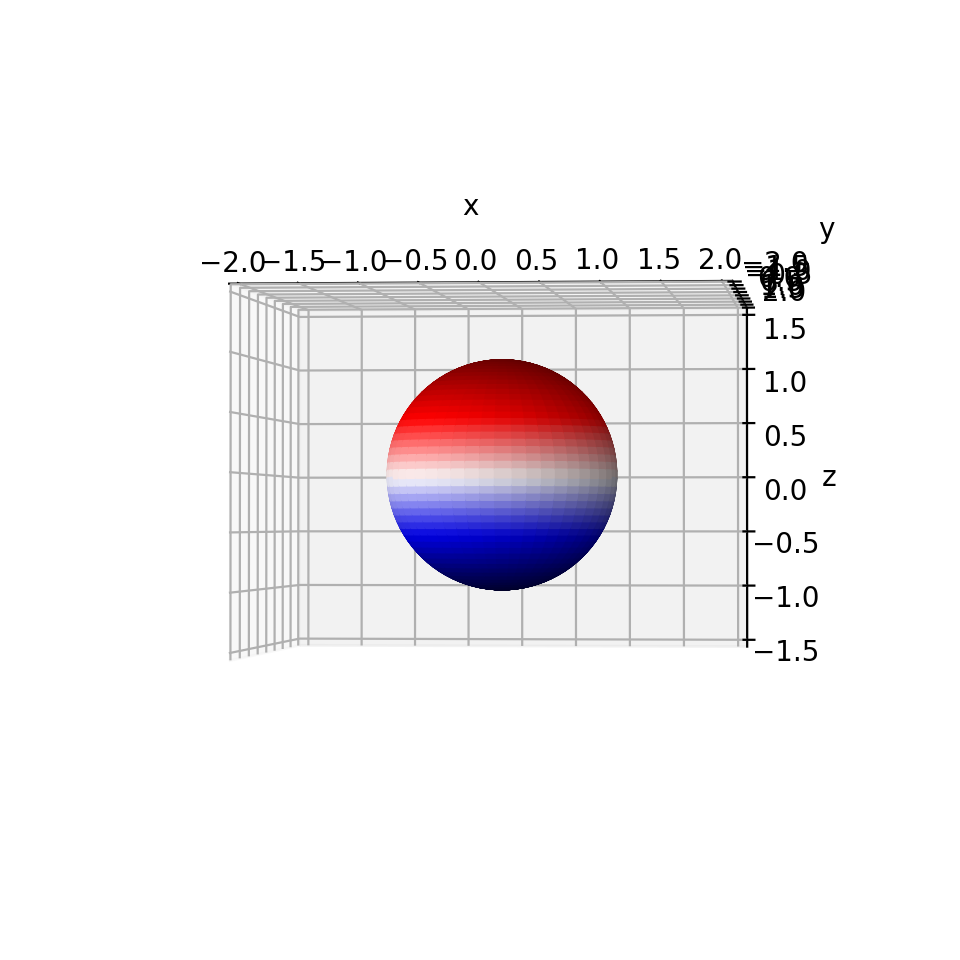

(-1.5, 1.5)

In [11]:
# Specify the zenith and azimuthal quantum numbers
l=1
ml=0

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sp.sph_harm(ml,l,phi,theta).real
if l>0:
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)
else:
    fcolors = np.ones(np.shape(fcolors))*.8
    
# Plot it
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-1.5,1.5)

### Eigenvalues of the spherical harmonics
In the cell below, use Eqs. 3 and 4 to calculate the first three energy levels (i.e., $E_0$, $E_1$, and $E_2$). You should report the energies in hartrees.

In [12]:
### BEGIN SOLUTION
r0 = AssignQuantity(1,'bohr')
I = r0**2*m; print(I)
for l in range(3):
    E = hbar**2 * l * (l+1)/(2*I)
    E.ito('hartree')
    print(l,E)
### END SOLUTION

1 bohr ** 2 * electron_mass
0 0.0 hartree
1 1.0000000000000004 hartree
2 3.0000000000000013 hartree


### Pause for analysis
The energies you got in the previous CGI, by numerically solving an approximate Particle-on-a-Sphere problem, won't be directly comparable to the results you just got, because the ground state in that case didn't have an energy of zero. However, you can legitimately compare energy *differences* relative to the ground state. In the cell below, comment on these differences.

Comparing $E_1-E_0$, numerical vs exact:
### BEGIN SOLUTION
The numerical result was about 1.0 hartrees (when nsteps=19); the exact result is 1.0 hartrees 
### END SOLUTION



Comparing $E_2-E_0$, numerical vs exact:
### BEGIN SOLUTION
The numerical result ranged 2.9-3.0 hartrees (when nsteps=19); the exact result is 3.0 hartrees 
### END SOLUTION

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page